# The first ML model to find false positives in AF PPI preditions
Created 2025-01-10

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pathlib import Path
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import sklearn

In [11]:
# First creating the human readable dataset
measureAF = pd.read_csv(Path("../ressources//af_structures.csv"))
measureSolved = pd.read_csv(Path("../ressources//solved_structures.csv"))
predictionAF = pd.read_excel(Path("../ressources/ISS AF_DMI_structures/AF_prediction_randomized_DMI_results.xlsx"))

measureAF["file"] = measureAF["file"].str.replace(".pdb", "")
measureSolved["file"] = measureSolved["file"].str.replace(".pdb", "")

dataAF = pd.merge(
    left=predictionAF,
    right=measureAF, 
    how='inner',
    left_on=['prediction_name', 'model_id'],
    right_on=['structure_name', 'file'],
)
if len(measureAF) > len(dataAF):
    print(f"{len(measureAF) - len(dataAF)} structures not found in the predictionAF excel sheet")

# Data preperation

# NaN value problem in min_distance
# Try as first a very naive approach: Replace them with 20
dataAF["min_distance"] = dataAF["min_distance"].fillna(value=20)

print("NaN values in dataset")
display(dataAF[dataAF.isnull().any(axis=1)])

X = dataAF.drop(columns=["structure_name", "file", "prediction_name", "model_id", "num_mutation_in_motif", "label"])
Y = dataAF[["label"]]
X.index = dataAF["structure_name"] + "_" + dataAF["file"]
Y.index = dataAF["structure_name"] + "_" + dataAF["file"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2501)
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")

display(X)
display(Y)

10 structures not found in the predictionAF excel sheet
NaN values in dataset


,prediction_name,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,...,num_atom_atom_contact,num_mutation_in_motif,label,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions


Training set shape: (1065, 17)
Test set shape: (267, 17)


,chainA_length,chainB_length,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,num_chainA_intf_res,num_chainB_intf_res,num_res_res_contact,num_atom_atom_contact,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
DEG_APCC_KENBOX_2_4GGD_ranked_0,312,5,0.887117,96.107999,77.495999,91.454999,0.162263,3.311542,15,5,23,208,9,0,613.651,6.063,0
DEG_APCC_KENBOX_2_4GGD_ranked_1,312,5,0.871984,95.793846,73.986000,89.736111,0.145001,3.395909,13,5,20,190,9,0,580.310,6.083,0
DEG_APCC_KENBOX_2_4GGD_ranked_2,312,5,0.760784,95.547501,57.906001,86.585239,0.116743,6.166772,16,5,27,237,10,0,662.104,6.072,3
DEG_APCC_KENBOX_2_4GGD_ranked_3,312,5,0.413662,94.646667,21.510000,76.362500,0.036380,16.713730,9,3,11,83,2,0,398.498,5.417,0
DEG_APCC_KENBOX_2_4GGD_ranked_4,312,5,0.359078,94.830001,19.753333,72.307001,0.029969,18.696838,7,3,9,108,2,0,323.304,5.092,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3_ranked_0,312,4,0.680386,94.414615,40.943334,84.388750,0.038101,6.028506,13,3,14,60,0,0,585.345,6.220,25
MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3_ranked_1,312,4,0.674241,89.304167,38.329999,79.109334,0.062945,6.435163,12,3,15,108,1,2,567.373,5.664,23
MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3_ranked_2,312,4,0.670584,90.133333,37.503333,76.975833,0.055375,6.313079,9,3,11,117,3,2,589.111,5.396,12
MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3_ranked_3,312,4,0.635099,87.795000,36.423333,77.520667,0.043403,6.988881,12,3,14,110,4,2,584.961,6.929,9


,label
DEG_APCC_KENBOX_2_4GGD_ranked_0,1
DEG_APCC_KENBOX_2_4GGD_ranked_1,1
DEG_APCC_KENBOX_2_4GGD_ranked_2,1
DEG_APCC_KENBOX_2_4GGD_ranked_3,1
DEG_APCC_KENBOX_2_4GGD_ranked_4,1
...,...
MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3_ranked_0,0
MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3_ranked_1,0
MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3_ranked_2,0
MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3_ranked_3,0


In [3]:
display(x_train)
display(y_train)

,chainA_length,chainB_length,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,num_chainA_intf_res,num_chainB_intf_res,num_res_res_contact,num_atom_atom_contact,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
MLIG_PAM2_2_2X04.DDOC_MAPK_MEF2A_6_4H3Q_ranked_3,352,14,0.406334,87.187857,30.447778,64.985218,0.037021,17.972174,14,9,25,205,2,0,841.403,4.888,24
MDOC_MAPK_JIP1_4_4H3B.DLIG_PAM2_1_1JGN_ranked_3,73,7,0.210969,96.027142,28.350000,71.417272,0.031629,19.353260,7,4,10,79,1,0,432.460,6.617,26
MLIG_14-3-3_ChREBP_3_5F74.DDOC_MAPK_JIP1_4_4H3B_ranked_3,356,16,0.362994,83.234166,30.505000,62.142500,0.027997,20.933567,12,8,20,211,3,0,978.833,4.820,13
MLIG_SH3_2_1CKA.DTRG_NLS_Bipartite_1_1PJM_ranked_2,460,6,0.611617,96.802143,33.080000,80.033158,0.060325,9.598278,14,5,17,153,6,1,640.395,4.545,23
TRG_DiLeu_BaEn_1_4NEE_ranked_2,142,6,0.818190,96.705000,85.400002,93.730000,0.215236,2.013762,14,5,26,182,2,0,769.964,4.837,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRG_NES_CRM1_1_3GB8_ranked_0,179,16,0.795128,94.645000,76.777692,87.606364,0.273476,2.075534,20,13,39,275,5,5,1389.344,4.832,104
MDOC_MAPK_RevD_3_3TEI.DLIG_EF_ALG2_ABM_1_2ZNE_ranked_0,168,15,0.386131,88.608800,27.776667,68.879460,0.069784,16.221300,25,12,45,421,3,2,1494.743,4.260,101
MLIG_LIR_Nem_3_5AZG.DLIG_ULM_U2AF65_1_1O0P_ranked_3,104,5,0.669382,93.812000,64.918000,86.588500,0.081375,3.914958,15,5,26,273,4,0,857.152,4.719,89
MLIG_UFM1_UFIM_1_5HKH.DLIG_KLC1_Yacidic_2_6FUZ_ranked_2,223,8,0.654822,94.002727,52.248571,83.924138,0.151285,6.337465,22,7,38,308,5,5,1283.438,5.470,93


,label
MLIG_PAM2_2_2X04.DDOC_MAPK_MEF2A_6_4H3Q_ranked_3,0
MDOC_MAPK_JIP1_4_4H3B.DLIG_PAM2_1_1JGN_ranked_3,0
MLIG_14-3-3_ChREBP_3_5F74.DDOC_MAPK_JIP1_4_4H3B_ranked_3,0
MLIG_SH3_2_1CKA.DTRG_NLS_Bipartite_1_1PJM_ranked_2,0
TRG_DiLeu_BaEn_1_4NEE_ranked_2,1
...,...
TRG_NES_CRM1_1_3GB8_ranked_0,1
MDOC_MAPK_RevD_3_3TEI.DLIG_EF_ALG2_ABM_1_2ZNE_ranked_0,0
MLIG_LIR_Nem_3_5AZG.DLIG_ULM_U2AF65_1_1O0P_ranked_3,0
MLIG_UFM1_UFIM_1_5HKH.DLIG_KLC1_Yacidic_2_6FUZ_ranked_2,0


## Model training

In [5]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, auc


def VisualizeModel(model: RandomForestClassifier, x_test, y_test):
    y_pred = model.predict(x_test)
    y_preda = model.predict_proba(x_test)

    score = accuracy_score(y_test, y_pred)
    rocauc_score = roc_auc_score(y_test, y_preda[:, 1])
    print(f"Score: {round(score, 3)}")
    print(f"ROC AUC score: {round(rocauc_score, 3)}")

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    cm = confusion_matrix(y_test, y_pred)
    imshow_cm = plt.imshow(cm, cmap="Blues")
    plt.colorbar(imshow_cm)
    plt.xticks(range(cm.shape[0]), labels=["Negative", "Positive"])
    plt.yticks(range(cm.shape[1]), labels=["Negative", "Positive"])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            c = "black" if colors.rgb_to_hsv(imshow_cm.cmap(cm[i,j])[:3])[1] < 0.4 else "white"
            text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)
    plt.show()


    roc_conf_X, roc_conf_Y, _ = roc_curve(y_test, x_test["model_confidence"])
    roc_conf = auc(roc_conf_X, roc_conf_Y)
    roc_model_X, roc_model_Y, _ = roc_curve(y_test, y_preda[:, 1])
    roc_model = auc(roc_model_X, roc_model_Y)

    plt.plot(roc_conf_X, roc_conf_Y, label=f"model confidence (AUC = {roc_conf:.2f})")
    plt.plot(roc_model_X, roc_model_Y, label=f"ml prediction (AUC = {roc_model:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve for Model and Test Subset Features")
    plt.legend(loc="lower right")
    plt.show()

    df = x_test.copy()
    df["label"] = y_test["label"]
    df["prediction"] = y_pred
    df["negative"] = y_preda[:, 0]
    df["positive"] = y_preda[:, 1]

    df = df[df["label"] != df["prediction"]]
    
    df.sort_values(by=["label", "prediction", "negative"], inplace=True)
    display(df)
    return df

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score: 0.835
ROC AUC score: 0.927


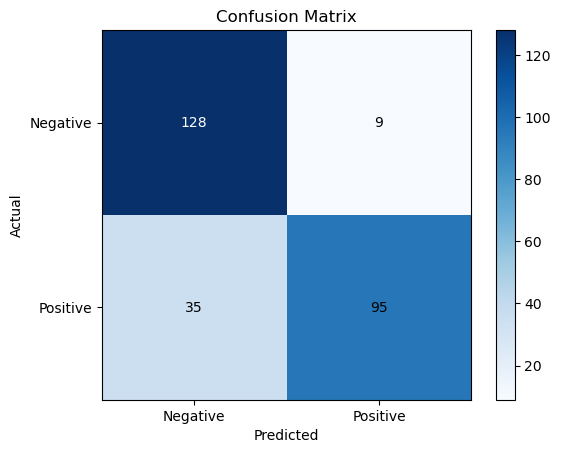

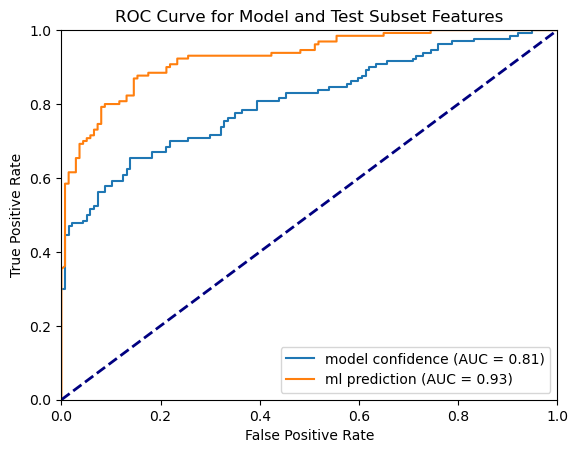

,chainA_length,chainB_length,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,num_chainA_intf_res,num_chainB_intf_res,...,num_atom_atom_contact,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions,label,prediction,negative,positive
MTRG_ENDOCYTIC_2_1BXX.DTRG_ER_FFAT_1_2RR3_ranked_0,125,4,0.867728,96.376666,87.002501,94.403158,0.168446,2.071921,15,4,...,250,3,0,892.117,4.741,20,0,1,0.040000,0.960000
MLIG_PTB_Apo_2_1NTV.DDOC_MAPK_JIP1_4_4H3B_ranked_0,356,8,0.814851,91.326876,70.028572,84.844783,0.117514,5.277957,16,7,...,321,6,2,1048.554,4.767,35,0,1,0.309210,0.690790
MLIG_NBox_RRM_1_2KXH.DLIG_PAM2_1_1JGN_ranked_0,73,11,0.601829,91.014616,69.871250,82.960000,0.104666,4.049870,13,8,...,227,3,0,874.912,4.978,54,0,1,0.360850,0.639150
MLIG_deltaCOP1_diTrp_1_5FJX.DLIG_CAP-Gly_1_2PZO_ranked_4,46,6,0.371831,95.084545,57.487499,85.058666,0.050722,5.015698,11,4,...,174,2,0,577.366,5.173,76,0,1,0.367236,0.632764
MLIG_Pex14_3_4BXU.DLIG_Clathr_ClatBox_1_1C9I_ranked_1,329,6,0.584325,91.358000,36.530001,77.651000,0.088081,12.168061,15,5,...,169,1,0,810.667,4.970,63,0,1,0.412127,0.587873
MLIG_deltaCOP1_diTrp_1_5FJX.DLIG_CAP-Gly_1_2PZO_ranked_2,46,6,0.400048,95.422727,62.094999,86.535333,0.093906,4.163994,11,4,...,169,4,0,583.829,4.941,53,0,1,0.466667,0.533333
MLIG_deltaCOP1_diTrp_1_5FJX.DLIG_CAP-Gly_1_2PZO_ranked_3,46,6,0.372302,94.977273,57.825999,83.367500,0.060740,4.807875,11,5,...,161,4,0,543.132,4.781,47,0,1,0.470166,0.529834
MLIG_EVH1_3_1MKE.DLIG_LSD1_SNAG_1_2Y48_ranked_0,543,6,0.656162,93.899545,30.985000,80.417857,0.119379,8.376726,22,6,...,331,2,0,1082.983,4.107,60,0,1,0.479615,0.520385
MLIG_FXI_DFP_1_5EOD.DLIG_BIR_III_3_1JD5_ranked_3,72,5,0.610782,96.877501,75.013334,90.914546,0.084436,3.466465,8,3,...,159,4,2,628.664,4.482,39,0,1,0.482669,0.517331
DEG_COP1_1_5IGO_ranked_3,324,8,0.661862,91.587369,46.392500,78.196296,0.126105,6.291859,19,8,...,278,5,0,1024.041,5.304,57,1,0,0.503312,0.496688


In [6]:
rf_param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [100, 250, 500],
    "max_depth": [4, 6, 8, 12],
    "min_samples_leaf": [2,3,4,5,10],
    "max_features" : [4,6,8, 10, 12,14]
}

rf = RandomForestClassifier(random_state=2501)
random_search = RandomizedSearchCV(n_iter=10, estimator=rf, param_distributions=rf_param_grid, scoring='accuracy', n_jobs=-1, verbose=2, random_state=2501)
random_search.fit(x_train, y_train["label"])
rf_best = random_search.best_estimator_
wrong_predictions = VisualizeModel(rf_best, x_test, y_test)

In [ ]:
wrong_predictions

## Model 2: Normalized measurement values
Normalize hbonds, salt_bridges, min_distance and hydrophobic interactions by dividing by num_res_res_contacts

In [57]:
print(x_train.columns)

x_train

Index(['chainA_length', 'chainB_length', 'model_confidence',
       'chainA_intf_avg_plddt', 'chainB_intf_avg_plddt', 'intf_avg_plddt',
       'pDockQ', 'iPAE', 'num_chainA_intf_res', 'num_chainB_intf_res',
       'num_res_res_contact', 'num_atom_atom_contact', 'hbonds',
       'salt_bridges', 'buried_area', 'min_distance',
       'hydrophobic_interactions'],
      dtype='object')


,chainA_length,chainB_length,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,num_chainA_intf_res,num_chainB_intf_res,num_res_res_contact,num_atom_atom_contact,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
1105,352,14,0.406334,87.187857,30.447778,64.985218,0.037021,17.972174,14,9,25,205,2,0,841.403,4.888,24
755,73,7,0.210969,96.027142,28.350000,71.417272,0.031629,19.353260,7,4,10,79,1,0,432.460,6.617,26
820,356,16,0.362994,83.234166,30.505000,62.142500,0.027997,20.933567,12,8,20,211,3,0,978.833,4.820,13
1194,460,6,0.611617,96.802143,33.080000,80.033158,0.060325,9.598278,14,5,17,153,6,1,640.395,4.545,23
624,142,6,0.818190,96.705000,85.400002,93.730000,0.215236,2.013762,14,5,26,182,2,0,769.964,4.837,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,179,16,0.795128,94.645000,76.777692,87.606364,0.273476,2.075534,20,13,39,275,5,5,1389.344,4.832,104
767,168,15,0.386131,88.608800,27.776667,68.879460,0.069784,16.221300,25,12,45,421,3,2,1494.743,4.260,101
1035,104,5,0.669382,93.812000,64.918000,86.588500,0.081375,3.914958,15,5,26,273,4,0,857.152,4.719,89
1249,223,8,0.654822,94.002727,52.248571,83.924138,0.151285,6.337465,22,7,38,308,5,5,1283.438,5.470,93


In [7]:
x2_train = x_train.copy()
x2_test = x_test.copy()

for c in ["hbonds", "salt_bridges", "hydrophobic_interactions"]:
    x2_train[c] = x_train.apply(lambda r: r[c] / r["num_res_res_contact"] if r["num_res_res_contact"] > 0 else 0, axis=1)
    x2_test[c] = x_test.apply(lambda r: r[c] / r["num_res_res_contact"] if r["num_res_res_contact"] > 0 else 0, axis=1)

#x2_train.drop(columns=["chainA_length", "chainB_length"], inplace=True)
#x2_test.drop(columns=["chainA_length", "chainB_length"], inplace=True)

display(x2_train)

,chainA_length,chainB_length,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,num_chainA_intf_res,num_chainB_intf_res,num_res_res_contact,num_atom_atom_contact,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
MLIG_PAM2_2_2X04.DDOC_MAPK_MEF2A_6_4H3Q_ranked_3,352,14,0.406334,87.187857,30.447778,64.985218,0.037021,17.972174,14,9,25,205,0.080000,0.000000,841.403,4.888,0.960000
MDOC_MAPK_JIP1_4_4H3B.DLIG_PAM2_1_1JGN_ranked_3,73,7,0.210969,96.027142,28.350000,71.417272,0.031629,19.353260,7,4,10,79,0.100000,0.000000,432.460,6.617,2.600000
MLIG_14-3-3_ChREBP_3_5F74.DDOC_MAPK_JIP1_4_4H3B_ranked_3,356,16,0.362994,83.234166,30.505000,62.142500,0.027997,20.933567,12,8,20,211,0.150000,0.000000,978.833,4.820,0.650000
MLIG_SH3_2_1CKA.DTRG_NLS_Bipartite_1_1PJM_ranked_2,460,6,0.611617,96.802143,33.080000,80.033158,0.060325,9.598278,14,5,17,153,0.352941,0.058824,640.395,4.545,1.352941
TRG_DiLeu_BaEn_1_4NEE_ranked_2,142,6,0.818190,96.705000,85.400002,93.730000,0.215236,2.013762,14,5,26,182,0.076923,0.000000,769.964,4.837,1.423077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRG_NES_CRM1_1_3GB8_ranked_0,179,16,0.795128,94.645000,76.777692,87.606364,0.273476,2.075534,20,13,39,275,0.128205,0.128205,1389.344,4.832,2.666667
MDOC_MAPK_RevD_3_3TEI.DLIG_EF_ALG2_ABM_1_2ZNE_ranked_0,168,15,0.386131,88.608800,27.776667,68.879460,0.069784,16.221300,25,12,45,421,0.066667,0.044444,1494.743,4.260,2.244444
MLIG_LIR_Nem_3_5AZG.DLIG_ULM_U2AF65_1_1O0P_ranked_3,104,5,0.669382,93.812000,64.918000,86.588500,0.081375,3.914958,15,5,26,273,0.153846,0.000000,857.152,4.719,3.423077
MLIG_UFM1_UFIM_1_5HKH.DLIG_KLC1_Yacidic_2_6FUZ_ranked_2,223,8,0.654822,94.002727,52.248571,83.924138,0.151285,6.337465,22,7,38,308,0.131579,0.131579,1283.438,5.470,2.447368


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score: 0.843
ROC AUC score: 0.934


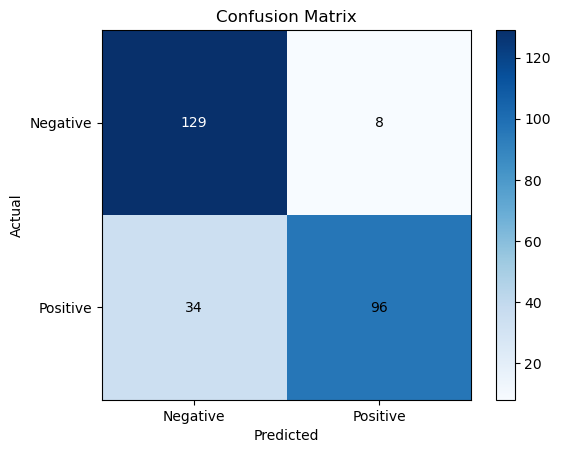

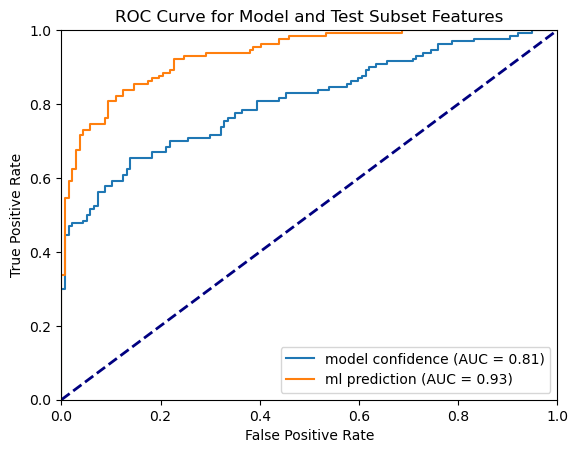

,chainA_length,chainB_length,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,num_chainA_intf_res,num_chainB_intf_res,...,num_atom_atom_contact,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions,label,prediction,negative,positive
MTRG_ENDOCYTIC_2_1BXX.DTRG_ER_FFAT_1_2RR3_ranked_0,125,4,0.867728,96.376666,87.002501,94.403158,0.168446,2.071921,15,4,...,250,0.115385,0.000000,892.117,4.741,0.769231,0,1,0.018900,0.981100
MLIG_PTB_Apo_2_1NTV.DDOC_MAPK_JIP1_4_4H3B_ranked_0,356,8,0.814851,91.326876,70.028572,84.844783,0.117514,5.277957,16,7,...,321,0.193548,0.064516,1048.554,4.767,1.129032,0,1,0.223238,0.776762
MLIG_deltaCOP1_diTrp_1_5FJX.DLIG_CAP-Gly_1_2PZO_ranked_4,46,6,0.371831,95.084545,57.487499,85.058666,0.050722,5.015698,11,4,...,174,0.133333,0.000000,577.366,5.173,5.066667,0,1,0.342265,0.657735
MLIG_NBox_RRM_1_2KXH.DLIG_PAM2_1_1JGN_ranked_0,73,11,0.601829,91.014616,69.871250,82.960000,0.104666,4.049870,13,8,...,227,0.115385,0.000000,874.912,4.978,2.076923,0,1,0.378650,0.621350
MLIG_EVH1_2_1DDV.DLIG_LIR_Apic_2_4EOY_ranked_2,124,5,0.532355,94.255454,43.520000,80.726000,0.065302,7.074955,11,4,...,164,0.176471,0.000000,637.656,4.628,5.058824,0,1,0.434477,0.565523
MLIG_deltaCOP1_diTrp_1_5FJX.DLIG_CAP-Gly_1_2PZO_ranked_3,46,6,0.372302,94.977273,57.825999,83.367500,0.060740,4.807875,11,5,...,161,0.222222,0.000000,543.132,4.781,2.611111,0,1,0.479774,0.520226
MLIG_EVH1_3_1MKE.DLIG_LSD1_SNAG_1_2Y48_ranked_0,543,6,0.656162,93.899545,30.985000,80.417857,0.119379,8.376726,22,6,...,331,0.064516,0.000000,1082.983,4.107,1.935484,0,1,0.491781,0.508219
MDEG_SCF_COI1_1_3OGL.DLIG_CaM_IQ_9_2IX7_ranked_1,139,18,0.398070,68.922000,47.594616,61.625789,0.040909,11.977779,25,13,...,384,0.222222,0.133333,1823.567,5.216,1.311111,0,1,0.492198,0.507802
DEG_COP1_1_5IGO_ranked_4,324,8,0.644072,91.548000,36.082857,73.900000,0.093137,6.128040,15,7,...,327,0.206897,0.068966,869.760,4.226,1.862069,1,0,0.502182,0.497818
LIG_WD40_WDR5_WIN_2_4CY3_ranked_3,312,7,0.656029,88.749999,39.466000,79.272307,0.098805,6.204505,21,5,...,238,0.093750,0.125000,990.388,5.490,0.843750,1,0,0.527360,0.472640


RandomForestClassifier(criterion='log_loss', max_depth=12, max_features=14,
                       min_samples_leaf=2, n_estimators=500, random_state=2501)

In [9]:
rf_param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [100, 250, 500],
    "max_depth": [8,12,16,None],
    "min_samples_leaf": [2,3,4,5,10],
    "max_features" : [10,12, 14, 16]
}

rf = RandomForestClassifier(random_state=2501)
random_search = RandomizedSearchCV(n_iter=10, estimator=rf, param_distributions=rf_param_grid, scoring='accuracy', n_jobs=-1, verbose=2, random_state=2501)
random_search.fit(x2_train, y_train["label"])
rf_best2 = random_search.best_estimator_
wrong_predictions = VisualizeModel(rf_best2, x2_test, y_test)
rf_best2

## Analyzing the false positives and the false negative

Todo

## Comparison with known structure

In [16]:
measureSolved_indexed = measureSolved.copy()
measureSolved_indexed.index = measureSolved["structure_name"] + "_" + measureSolved["file"]
display(measureSolved_indexed)
display(wrong_predictions)

dfpred_solved = pd.merge(
    left=wrong_predictions,
    right=measureAF, 
    how='inner',
    left_index= True,
    right_index=True
)
dfpred_solved

,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
1ATP_min_DMI_1ATP_min_DMI,1ATP_min_DMI,1ATP_min_DMI,1,0,808.592,6.273,77
1AXC_min_DMI_1AXC_min_DMI,1AXC_min_DMI,1AXC_min_DMI,4,0,1209.332,4.174,62
1B72_min_DMI_1B72_min_DMI,1B72_min_DMI,1B72_min_DMI,1,0,547.149,5.182,36
1B8Q_min_DMI_1B8Q_min_DMI,1B8Q_min_DMI,1B8Q_min_DMI,4,0,871.756,4.376,42
1BXX_min_DMI_1BXX_min_DMI,1BXX_min_DMI,1BXX_min_DMI,6,0,783.465,4.435,19
...,...,...,...,...,...,...,...
5MLW_min_DMI_5MLW_min_DMI,5MLW_min_DMI,5MLW_min_DMI,2,0,960.870,4.282,114
5VZU_min_DMI_5VZU_min_DMI,5VZU_min_DMI,5VZU_min_DMI,4,0,868.375,4.959,33
6FUZ_min_DMI_6FUZ_min_DMI,6FUZ_min_DMI,6FUZ_min_DMI,10,3,1081.201,5.532,2
6G84_min_DMI_6G84_min_DMI,6G84_min_DMI,6G84_min_DMI,4,0,1146.941,5.521,35


,chainA_length,chainB_length,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,num_chainA_intf_res,num_chainB_intf_res,...,num_atom_atom_contact,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions,label,prediction,negative,positive
MTRG_ENDOCYTIC_2_1BXX.DTRG_ER_FFAT_1_2RR3_ranked_0,125,4,0.867728,96.376666,87.002501,94.403158,0.168446,2.071921,15,4,...,250,0.115385,0.000000,892.117,4.741,0.769231,0,1,0.018900,0.981100
MLIG_PTB_Apo_2_1NTV.DDOC_MAPK_JIP1_4_4H3B_ranked_0,356,8,0.814851,91.326876,70.028572,84.844783,0.117514,5.277957,16,7,...,321,0.193548,0.064516,1048.554,4.767,1.129032,0,1,0.223238,0.776762
MLIG_deltaCOP1_diTrp_1_5FJX.DLIG_CAP-Gly_1_2PZO_ranked_4,46,6,0.371831,95.084545,57.487499,85.058666,0.050722,5.015698,11,4,...,174,0.133333,0.000000,577.366,5.173,5.066667,0,1,0.342265,0.657735
MLIG_NBox_RRM_1_2KXH.DLIG_PAM2_1_1JGN_ranked_0,73,11,0.601829,91.014616,69.871250,82.960000,0.104666,4.049870,13,8,...,227,0.115385,0.000000,874.912,4.978,2.076923,0,1,0.378650,0.621350
MLIG_EVH1_2_1DDV.DLIG_LIR_Apic_2_4EOY_ranked_2,124,5,0.532355,94.255454,43.520000,80.726000,0.065302,7.074955,11,4,...,164,0.176471,0.000000,637.656,4.628,5.058824,0,1,0.434477,0.565523
MLIG_deltaCOP1_diTrp_1_5FJX.DLIG_CAP-Gly_1_2PZO_ranked_3,46,6,0.372302,94.977273,57.825999,83.367500,0.060740,4.807875,11,5,...,161,0.222222,0.000000,543.132,4.781,2.611111,0,1,0.479774,0.520226
MLIG_EVH1_3_1MKE.DLIG_LSD1_SNAG_1_2Y48_ranked_0,543,6,0.656162,93.899545,30.985000,80.417857,0.119379,8.376726,22,6,...,331,0.064516,0.000000,1082.983,4.107,1.935484,0,1,0.491781,0.508219
MDEG_SCF_COI1_1_3OGL.DLIG_CaM_IQ_9_2IX7_ranked_1,139,18,0.398070,68.922000,47.594616,61.625789,0.040909,11.977779,25,13,...,384,0.222222,0.133333,1823.567,5.216,1.311111,0,1,0.492198,0.507802
DEG_COP1_1_5IGO_ranked_4,324,8,0.644072,91.548000,36.082857,73.900000,0.093137,6.128040,15,7,...,327,0.206897,0.068966,869.760,4.226,1.862069,1,0,0.502182,0.497818
LIG_WD40_WDR5_WIN_2_4CY3_ranked_3,312,7,0.656029,88.749999,39.466000,79.272307,0.098805,6.204505,21,5,...,238,0.093750,0.125000,990.388,5.490,0.843750,1,0,0.527360,0.472640


,chainA_length,chainB_length,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,num_chainA_intf_res,num_chainB_intf_res,...,prediction,negative,positive,structure_name,file,hbonds_y,salt_bridges_y,buried_area_y,min_distance_y,hydrophobic_interactions_y


In [20]:
measureAF

,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,DEG_APCC_KENBOX_2_4GGD,ranked_0,9,0,613.651,6.063,0
1,DEG_APCC_KENBOX_2_4GGD,ranked_1,9,0,580.310,6.083,0
2,DEG_APCC_KENBOX_2_4GGD,ranked_2,10,0,662.104,6.072,3
3,DEG_APCC_KENBOX_2_4GGD,ranked_3,2,0,398.498,5.417,0
4,DEG_APCC_KENBOX_2_4GGD,ranked_4,2,0,323.304,5.092,9
...,...,...,...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0,12,3,883.012,4.542,29
1338,TRG_PTS1_2C0L,ranked_1,11,3,889.343,4.559,29
1339,TRG_PTS1_2C0L,ranked_2,12,3,890.493,4.574,30
1340,TRG_PTS1_2C0L,ranked_3,11,3,894.777,4.529,30
